# Creating interactive metabolite-protein network
To create a webpage for displaying metabolite-protein networks using Python, you can use a combination of Dash for the web application framework and NetworkX along with Plotly or Cytoscape for visualizing the network. Here's a basic guide on how you can get started:

Step 1: Install Required Libraries

In [2]:
pip install dash dash-cytoscape networkx

  Created wheel for dash-cytoscape: filename=dash_cytoscape-1.0.2-py3-none-any.whl size=4010735 sha256=ff7b83e2358f7ae64ec91c5fc534ba3ecdbba609a9bf76704ba1228c1ada8bcb
  Stored in directory: c:\users\ruthb\appdata\local\pip\cache\wheels\7f\5d\69\48ee73398433d0efabd8521627493531f95cde3ab81805e0c1
Successfully built dash-cytoscape
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
Note: you may need to restart the kernel to use updated packages.


Step 2: Create the Network Visualization
You'll need to create a network graph that represents the metabolite-protein interactions. This can be done using NetworkX.

In [3]:
import networkx as nx

# Create a NetworkX graph
G = nx.Graph()

# Add nodes (metabolites and proteins)
G.add_node("Metabolite1", color="blue")
G.add_node("Protein1", color="red")
G.add_node("Protein2", color="red")

# Add edges (interactions)
G.add_edge("Metabolite1", "Protein1")
G.add_edge("Metabolite1", "Protein2")

# You can add more nodes and edges as per your data


Step 3: Create a Dash Application
Now, you'll create a Dash application that uses Cytoscape to visualize the network.

In [4]:
import dash
import dash_cytoscape as cyto
from dash import html

app = dash.Dash(__name__)

# Convert the NetworkX graph to a format suitable for Cytoscape
elements = [
    {"data": {"id": node, "label": node}, "classes": G.nodes[node]['color']}
    for node in G.nodes
] + [
    {"data": {"source": edge[0], "target": edge[1]}}
    for edge in G.edges
]

# Define the layout of the Dash app
app.layout = html.Div([
    cyto.Cytoscape(
        id='cytoscape-network',
        elements=elements,
        layout={'name': 'cose'},  # Layout of the network
        style={'width': '100%', 'height': '600px'},
        stylesheet=[
            {
                "selector": '.blue',
                "style": {
                    "background-color": "blue",
                    "line-color": "blue"
                }
            },
            {
                "selector": '.red',
                "style": {
                    "background-color": "red",
                    "line-color": "red"
                }
            }
        ]
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

Step 4: Run the Application
After creating the app.py file with the above code, you can run it using the following command:

In [5]:
#python app.py

This will start a local web server, and you can view your network visualization by navigating to http://127.0.0.1:8050/ in your web browser.

# Providing metabolites and protein dataframes to calculate correlation matrix and color nodes
To create a NetworkX graph based on two dataframes—one for metabolites and one for proteins—where rows represent samples, and columns represent either metabolites or proteins, you can follow these steps:

Step 1: Import Libraries

In [18]:
import dash
import dash_cytoscape as cyto
from dash import html
import pandas as pd
import networkx as nx
import matplotlib.colors as mcolors

Step 2: Prepare the Data
Let's assume you have two dataframes:

df_metabolites: Rows are samples, columns are metabolites.
df_proteins: Rows are samples, columns are proteins.
Here is an example of how these dataframes might look:

In [19]:
# Example dataframes
data_metabolites = {
    'Metabolite1': [0.8, 0.1, -0.5],
    'Metabolite2': [-0.6, 0.9, 0.0],
    'Metabolite3': [0.4, -0.7, 0.2]
}

data_proteins = {
    'Protein1': [0.7, -0.2, 0.4],
    'Protein2': [-0.5, 0.8, 0.0],
    'Protein3': [0.9, 0.3, -0.6]
}

df_metabolites = pd.DataFrame(data_metabolites)
df_proteins = pd.DataFrame(data_proteins)

print(df_metabolites)
print(df_proteins)

   Metabolite1  Metabolite2  Metabolite3
0          0.8         -0.6          0.4
1          0.1          0.9         -0.7
2         -0.5          0.0          0.2
   Protein1  Protein2  Protein3
0       0.7      -0.5       0.9
1      -0.2       0.8       0.3
2       0.4       0.0      -0.6


Step 3: Create the NetworkX Graph
You'll want to create edges between metabolites and proteins based on some criteria. A common approach is to create an edge if the correlation between a metabolite and a protein across samples is above a certain threshold.

In [20]:
# Function to map values to colors
def value_to_color(value):
    norm = mcolors.Normalize(vmin=-1, vmax=1)
    cmap = mcolors.LinearSegmentedColormap.from_list("red_white_blue", ["blue", "white", "red"])
    return mcolors.to_hex(cmap(norm(value)))

# Create a graph
G = nx.Graph()

# Add metabolites as nodes
for metabolite in df_metabolites.columns:
    for i, value in enumerate(df_metabolites[metabolite]):
        G.add_node(f"{metabolite}_{i}", type='metabolite', value=value, color=value_to_color(value))

# Add proteins as nodes
for protein in df_proteins.columns:
    for i, value in enumerate(df_proteins[protein]):
        G.add_node(f"{protein}_{i}", type='protein', value=value, color=value_to_color(value))

# Add edges based on correlation (example threshold correlation between first elements)
threshold = 0.5  # Define a threshold for correlation

for i in range(df_metabolites.shape[0]):
    for metabolite in df_metabolites.columns:
        for protein in df_proteins.columns:
            correlation = df_metabolites[metabolite].corr(df_proteins[protein])
            if abs(correlation) > threshold:
                G.add_edge(f"{metabolite}_{i}", f"{protein}_{i}", weight=correlation)

# Optionally, you can print or inspect the graph
print(G)
print(G.nodes())
print(G.edges(data=True))

Graph with 18 nodes and 15 edges
['Metabolite1_0', 'Metabolite1_1', 'Metabolite1_2', 'Metabolite2_0', 'Metabolite2_1', 'Metabolite2_2', 'Metabolite3_0', 'Metabolite3_1', 'Metabolite3_2', 'Protein1_0', 'Protein1_1', 'Protein1_2', 'Protein2_0', 'Protein2_1', 'Protein2_2', 'Protein3_0', 'Protein3_1', 'Protein3_2']
[('Metabolite1_0', 'Protein3_0', {'weight': 0.9873316923407114}), ('Metabolite1_1', 'Protein3_1', {'weight': 0.9873316923407114}), ('Metabolite1_2', 'Protein3_2', {'weight': 0.9873316923407114}), ('Metabolite2_0', 'Protein1_0', {'weight': -0.9971764649527378}), ('Metabolite2_0', 'Protein2_0', {'weight': 0.9998469895178864}), ('Metabolite2_1', 'Protein1_1', {'weight': -0.9971764649527378}), ('Metabolite2_1', 'Protein2_1', {'weight': 0.9998469895178864}), ('Metabolite2_2', 'Protein1_2', {'weight': -0.9971764649527378}), ('Metabolite2_2', 'Protein2_2', {'weight': 0.9998469895178864}), ('Metabolite3_0', 'Protein1_0', {'weight': 0.9869115726091126}), ('Metabolite3_0', 'Protein2_0', {

Step 4: Analyze and Visualize
Now that you've created the network graph, you can proceed to visualize it or perform further analysis. Here’s a simple way to visualize it:

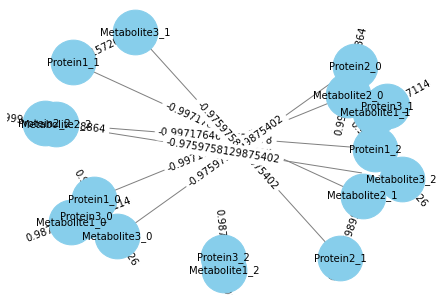

In [21]:
import matplotlib.pyplot as plt

# Draw the graph
pos = nx.spring_layout(G)  # Layout for visual representation
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=2000, font_size=10)

# Draw edge labels (optional, showing correlation)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

To create a dynamic visualization of your metabolite-protein network using Cytoscape within a Dash application, you can follow these steps:

Step 1: Install Required Libraries

In [12]:
#pip install dash dash-cytoscape pandas networkx

Step 2 (need to run previous steps for network generation): Convert the NetworkX Graph to Cytoscape Elements
Convert your NetworkX graph to a format that Cytoscape can use.

In [22]:
# Convert the NetworkX graph to a Cytoscape format
elements = [
    {"data": {"id": node, "label": node.split('_')[0], "node_type": G.nodes[node]['type']}, "style": {"background-color": G.nodes[node]['color']}}
    for node in G.nodes
] + [
    {"data": {"source": edge[0], "target": edge[1], "weight": G.edges[edge]['weight']}}
    for edge in G.edges
]

Step 3: Create the Dash Application with Cytoscape
Create the Dash application to visualize the network dynamically.

In [23]:
import dash
import dash_cytoscape as cyto
from dash import html

app = dash.Dash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        id='cytoscape-network',
        elements=elements,
        layout={'name': 'cose'},  # Layout of the network
        style={'width': '100%', 'height': '600px'},
        stylesheet=[
            {
                "selector": '[node_type="metabolite"]',
                "style": {
                    "label": "data(label)"
                }
            },
            {
                "selector": '[node_type="protein"]',
                "style": {
                    "shape": "diamond",  # Change shape to diamond
                    "label": "data(label)"
                }
            },
            {
                "selector": 'edge',
                "style": {
                    "width": "mapData(weight, 0, 1, 1, 5)",  # Adjust width based on weight
                    "line-color": "gray"
                }
            }
        ]
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

# Providing correlation matrix from external source
Assume you have:

correlation_df: A dataframe with correlations between metabolites and proteins.
df_metabolites: A dataframe with metabolite values.
df_proteins: A dataframe with protein values.

Step 1: Prepare the Data
Assume you have:

correlation_df: A dataframe with correlations between metabolites and proteins.
df_metabolites: A dataframe with metabolite values.
df_proteins: A dataframe with protein values.

In [28]:
import dash
import dash_cytoscape as cyto
from dash import html
import pandas as pd
import networkx as nx
import matplotlib.colors as mcolors

# Example correlation table (external source)
# Rows represent metabolite-protein pairs with a correlation value
correlation_data = {
    'Metabolite': ['Metabolite1', 'Metabolite1', 'Metabolite2', 'Metabolite3'],
    'Protein': ['Protein1', 'Protein2', 'Protein1', 'Protein3'],
    'Correlation': [0.8, -0.6, 0.4, 0.9]
}
df_correlations = pd.DataFrame(correlation_data)

# Example metabolite dataframe (used for node coloring)
data_metabolites = {
    'Metabolite1': [0.8, 0.1, -0.5],
    'Metabolite2': [-0.6, 0.9, 0.0],
    'Metabolite3': [0.4, -0.7, 0.2]
}
df_metabolites = pd.DataFrame(data_metabolites)

# Example protein dataframe (used for node coloring)
data_proteins = {
    'Protein1': [0.7, -0.2, 0.4],
    'Protein2': [-0.5, 0.8, 0.0],
    'Protein3': [0.9, 0.3, -0.6]
}
df_proteins = pd.DataFrame(data_proteins)

Step 2: Create the Dash Application

In [29]:
# Function to map values to colors
def value_to_color(value):
    norm = mcolors.Normalize(vmin=-1, vmax=1)
    cmap = mcolors.LinearSegmentedColormap.from_list("red_white_blue", ["blue", "white", "red"])
    return mcolors.to_hex(cmap(norm(value)))

# Create a NetworkX graph
G = nx.Graph()

# Add nodes from metabolites dataframe
for metabolite in df_metabolites.columns:
    avg_value = df_metabolites[metabolite].mean()  # Calculate average value for coloring
    G.add_node(metabolite, type='metabolite', color=value_to_color(avg_value))

# Add nodes from proteins dataframe
for protein in df_proteins.columns:
    avg_value = df_proteins[protein].mean()  # Calculate average value for coloring
    G.add_node(protein, type='protein', color=value_to_color(avg_value))

# Add edges from the correlation table
for index, row in df_correlations.iterrows():
    G.add_edge(row['Metabolite'], row['Protein'], weight=row['Correlation'])

# Convert the NetworkX graph to a Cytoscape format
elements = [
    {"data": {"id": node, "label": node, "node_type": G.nodes[node]['type']}, "style": {"background-color": G.nodes[node]['color']}}
    for node in G.nodes
] + [
    {"data": {"source": edge[0], "target": edge[1], "weight": G.edges[edge]['weight']}}
    for edge in G.edges
]

# Create the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        id='cytoscape-network',
        elements=elements,
        layout={'name': 'cose'},  # Layout of the network
        style={'width': '100%', 'height': '600px'},
        stylesheet=[
            {
                "selector": '[node_type="metabolite"]',
                "style": {
                    "label": "data(label)"
                }
            },
            {
                "selector": '[node_type="protein"]',
                "style": {
                    "shape": "diamond",  # Change shape to diamond
                    "label": "data(label)"
                }
            },
            {
                "selector": 'edge',
                "style": {
                    "width": "mapData(weight, 0, 1, 1, 5)",  # Adjust width based on weight
                    "line-color": "gray"
                }
            }
        ]
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

Optional: Subsetting a correlation matrix/network to only include interactors within a distance of up to 2 chemical reactions

In [30]:
# Step 3: Subset the graph to include nodes within 2 chemical reactions of a central gene
central_gene = 'Protein1'

# Get neighbors within 2 steps
subgraph_nodes = set(nx.single_source_shortest_path_length(G, central_gene, cutoff=2).keys())

# Create a subgraph
subgraph = G.subgraph(subgraph_nodes).copy()